## PCA(Principle Componet Analysis) - 주성분 분석 ##

- #### 여러개의 변수(특성 Feature) 대표할 수 있는 주성분이라는 새로운 변수를 만듦  
- #### 여러개의 3D 이미지(공간)를 잘 설명할 수 있는 2D이미지(그림자)를 찾는다.


##### 1단계: 데이터 표준화(Standaridization)
각 변수의 평균을 0, 분산을 1로 만들어서 모든 데이터가 동일한 스케일    
키(3자리)와 몸무게(2자리)

In [35]:
%conda install pandas scikit-learn matplotlib seaborn numpy

3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [37]:
%conda update -n base -c defaults conda

3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 예제데이터 붓꽃
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df = iris.data
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X = df.loc[:,:"petal width (cm)"].values
# 표준화 진행
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

#### 2단계 : 공분산 행렬 계산(covariance Matrix)
공분산 : 두 변수가 함께 어떻게 변하는지를 나타내는 값
양수 : 한변수가 증가할때 같이 증가
음수 : 반대
공분산 행렬 : 모든 변수 쌍들의 공분산을 행렬로 정리한 것 -> 이 행렬을 통해서 데이터가 어떤 방향으로 퍼져갈 수 있음

#### 3단계  고유값과 고유벡터 계산

공분산 행렬을 이용해서 고유값 고유벡터 찾는다
고유벡터: 데이터가 어떤 방향으로 가장 크게 분산(퍼져있는 정도)되어 있는지를 나타내는 방향 벡터. 이 뱡향이 새로운 축 즉 주성분
고유값 : 해당 고유벡터 방향으로 데이터가 얼마나 많이 퍼져있는지를 나타내는 힘의 크기, 이 값이 크면 그 방향이 데이터를 더 많이 설명한다느 의미

pca 고유값의 크기 순서에 따라서 제 1주성분(PC1), 제 2 주성분(PC2) 등
PC1 데이터를 가장 잘 설명하는 축이고, PC2는 PC1과 직각을 이루면서 그 다음으로 데이터를 잘 표현

#### 4단계 : 주성분 결정 및 데이터 변환
계산된 고유벡터 축에 원래 데이터를 투영(projection)하여 차원을 축소함
붓꽃은 4개 특성을 2개의 주성분(2차원)으로 변환해서 시각화

[0.72962445 0.22850762]


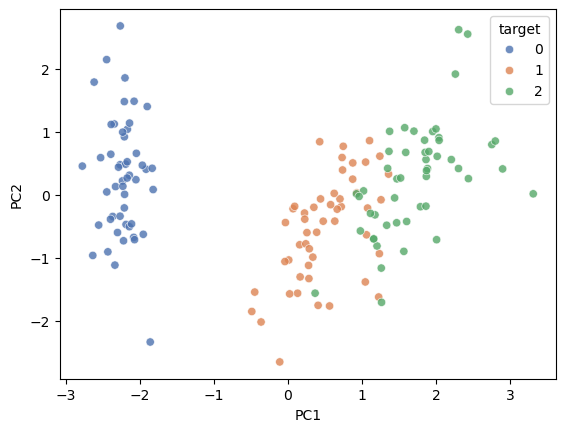

In [24]:
# 2 3 4 단계 : PCA 수행 및 데이터 변환
pca = PCA(n_components=2)
pricipleComponents = pca.fit_transform(X_scaled)
X_scaled
# 주성분 분석 결과를 DataFrame으로 변환
pc_df = pd.DataFrame(data = pricipleComponents,columns=['PC1','PC2'])
pc_df['target'] = df.target
pc_df.head()

# 각 주성분이 설명하는 분산의 양(고유값의 중요도) 
print(pca.explained_variance_ratio_)  # 주성분 두개 만으로도 전체대비 95.7% 설명

# 시각화
sns.scatterplot(data=pc_df, x = 'PC1', y='PC2', hue ='target', alpha =0.8, palette='deep')
plt.show()

In [ ]:
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
# 데이터셋  예측
diabetes = datasets.load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. 적절한 데이터 전처리
X_scaled = StandardScaler().fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(x_train,y_train)
# 2 모델을 적용해서 score 를 확인
print(f'non pca train score : {rfr.score(x_train,y_train)}')
print(f'non pca train score : {rfr.score(x_test,y_test)}')
##############################################################
# 1. 적절한 데이터 전처리데이터를 가지고 PCA로 주성분을 적당한 개수로 설정해서 데이터를 변환해서
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=42)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(x_train_pca, y_train)
# 2 모델을 적용해서 score 를 확인
print(f' pca train score : {rfr.score(x_train_pca,y_train)}')
print(f' pca train score : {rfr.score(x_test_pca,y_test)}')

non pca train score : 0.9224312716434434
non pca train score : 0.4289500124765706
 pca train score : 0.42417122137744234
 pca train score : 0.31069440345457033


In [100]:
X.age.mean()

np.float64(-2.511816797794472e-19)

In [116]:
# 하이퍼 파라메터 튜닝  gridsearch
# 학습에 영향주는 모든 파라메터를 하이퍼 파라메터

from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 데이터셋  예측
diabetes = datasets.load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 1. 적절한 데이터 전처리
X_scaled = StandardScaler().fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
rfr = RandomForestRegressor()
param_grid = {
    'max_depth':[3,5,10,12,15],
    'max_features':['sqrt','log2'],
    'min_samples_split': [1,2,5,10],
    'min_samples_leaf': [1,3,5,7],
}
gridcv = GridSearchCV(rfr,return_train_score=True,param_grid=param_grid)
gridcv.fit(x_train,y_train)

c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
200 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_parameter_constraints(


AttributeError: 'bool' object has no attribute 'all'

AttributeError: 'bool' object has no attribute 'all'

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 10, 12, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [1, 2, 5, 10]},
             return_train_score=True)

In [117]:
gridcv.best_score_, gridcv.best_params_, gridcv.cv_results_['mean_train_score']

(np.float64(0.4431746503167364),
 {'max_depth': 10,
  'max_features': 'sqrt',
  'min_samples_leaf': 5,
  'min_samples_split': 10},
 array([       nan, 0.57017774, 0.57203372, 0.56562377,        nan,
        0.56526133, 0.56812117, 0.56010703,        nan, 0.55807724,
        0.56138202, 0.55821477,        nan, 0.55646013, 0.55464062,
        0.55313805,        nan, 0.56884117, 0.57171651, 0.56826914,
               nan, 0.56411148, 0.56655124, 0.56827041,        nan,
        0.55995359, 0.56200738, 0.56053541,        nan, 0.55429469,
        0.55496889, 0.55199507,        nan, 0.72892297, 0.71844018,
        0.69203643,        nan, 0.70062636, 0.6992545 , 0.68114695,
               nan, 0.66527965, 0.66494596, 0.6649432 ,        nan,
        0.63422958, 0.63312133, 0.63484252,        nan, 0.72961357,
        0.71955342, 0.69334168,        nan, 0.70148935, 0.70125199,
        0.68172024,        nan, 0.66457729, 0.6672028 , 0.66409244,
               nan, 0.63560499, 0.63368525, 0.6315714